In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import mglearn

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

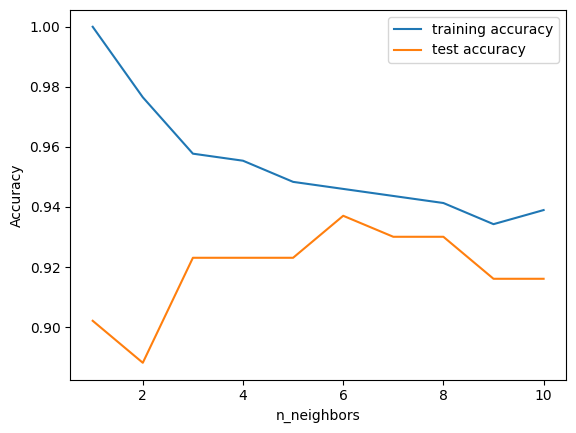

In [20]:
training_accuracy = []
test_accuracy = []

neighbor_settings = range(1,11)

for n_neighbors in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbor_settings, training_accuracy, label="training accuracy")
plt.plot(neighbor_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

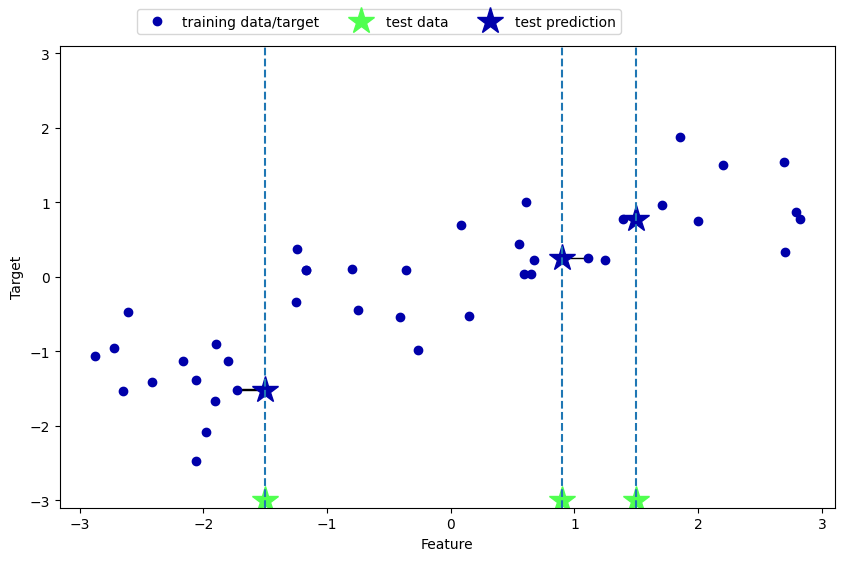

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

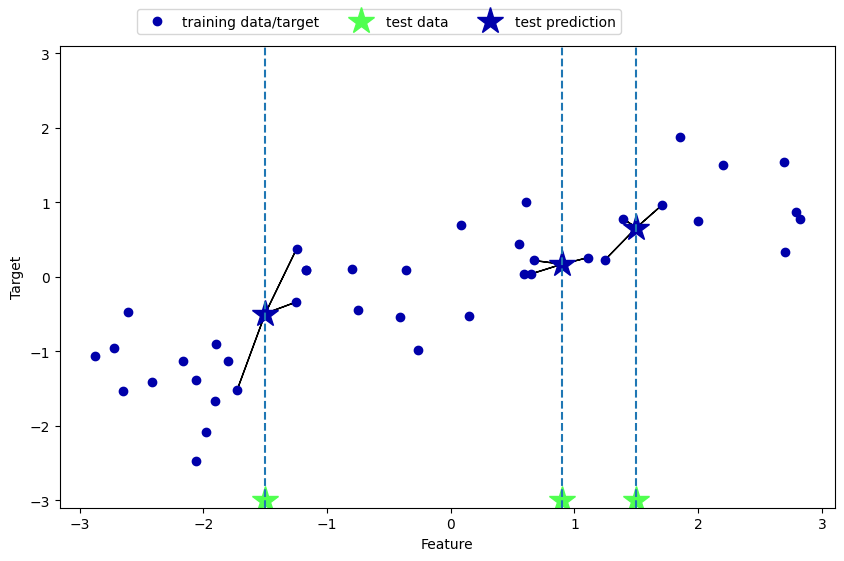

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print(f"Test set predictions: {reg.predict(X_test)}")
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


ValueError: Found array with dim 3. KNeighborsRegressor expected <= 2.

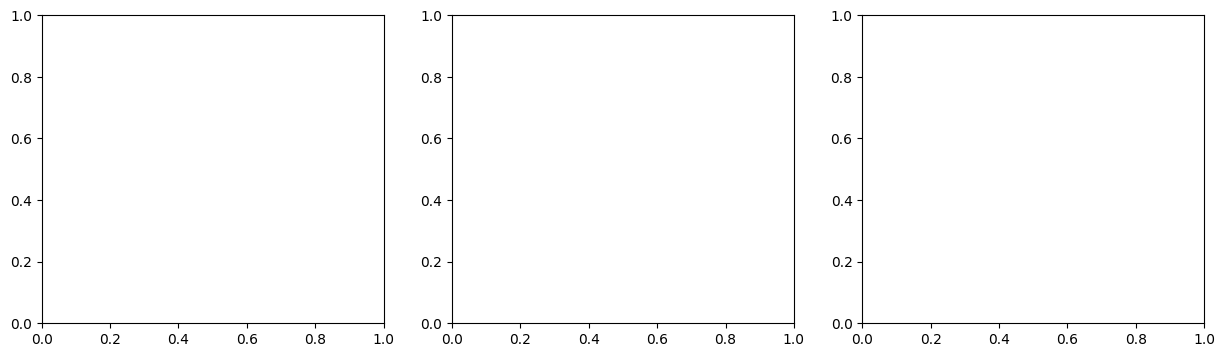

In [52]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}"
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training data/target", "Test data/target"], loc="best")